In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data = pd.read_csv('3.0a.csv')

In [23]:
data = data.drop('id', axis=1)

In [28]:
data.head()

,midu,hantanglv,haogua
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
midu         17 non-null float64
hantanglv    17 non-null float64
haogua       17 non-null int64
dtypes: float64(2), int64(1)
memory usage: 480.0 bytes


In [26]:
scatter1 = data.loc[data['haogua']==1]
scatter2 = data.loc[data['haogua']==0]

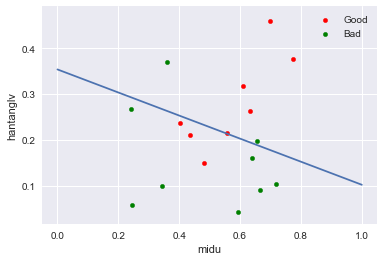

In [197]:
ax = scatter1.plot.scatter(x='midu', y='hantanglv', color='red', label='Good')
scatter2.plot.scatter(x='midu', y='hantanglv', color='green', label='Bad', ax=ax)
plt.plot(line_x, line_y)
plt.show()

In [37]:
x_train = data.drop('haogua', axis=1)

In [198]:
y = np.transpose(np.array([data.haogua.tolist()]))

In [116]:
m = 17

In [199]:
X = np.zeros((m, 3))
for i in range(m):
    xi = x_train.loc[i].tolist()
    xi.insert(0, 1)
    X[i] = xi

In [79]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [83]:
theta = np.zeros((3, 1))

In [148]:
def cost(theta):
    h = sigmoid(np.dot(X, theta))
    cost = -(np.dot(np.transpose(y), np.log(h)) + np.dot(np.transpose(1-y), np.log(1-h)))/m
    return cost

In [175]:
echo = 500
cost_list = []
theta = np.zeros((3, 1))
alpha = 0.3
for i in range(echo):
    h = sigmoid(np.dot(X, theta))
    theta = theta - alpha*np.dot(np.transpose(X), (h - y))
    cost_tmp = cost(theta)
    cost_list.append(cost_tmp[0][0])
    #print theta
    #print cost_tmp

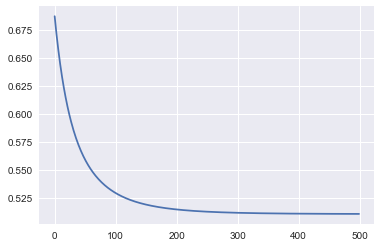

In [176]:
plt.plot(cost_list)

In [177]:
theta

array([[ -4.29484846],
       [  3.05819288],
       [ 12.13081441]])

In [195]:
line_x = np.linspace(0, 1.0, 10)
line_y = -(theta[0][0] + theta[1][0]*line_x)/theta[2][0]

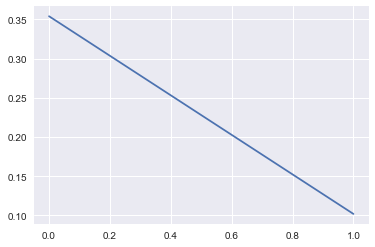

In [196]:
plt.plot(line_x, line_y)